<a href="https://colab.research.google.com/github/KishoreRam-M/Machine-Learing/blob/main/Multiple-Regression/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Lib

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc


# Load The DataSet

In [7]:
datset=pd.read_csv('/content/diabetes.csv')
display(datset)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# check the Outiliers

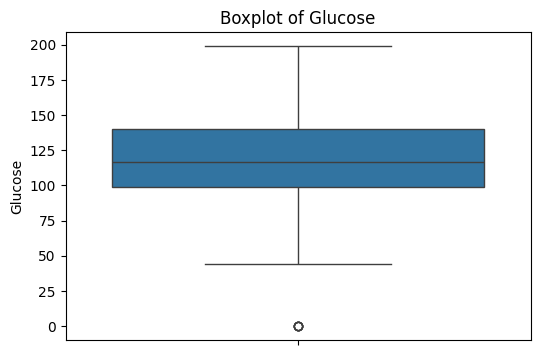

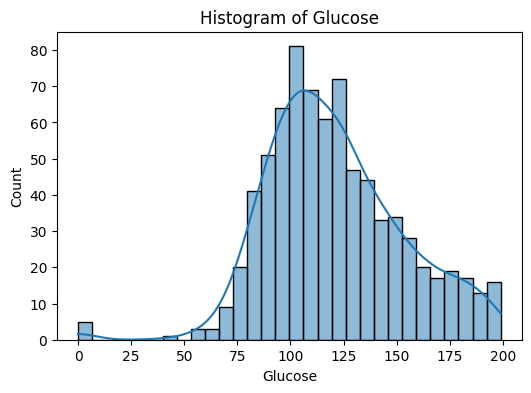

Skewness of Glucose: 0.17375350179188992


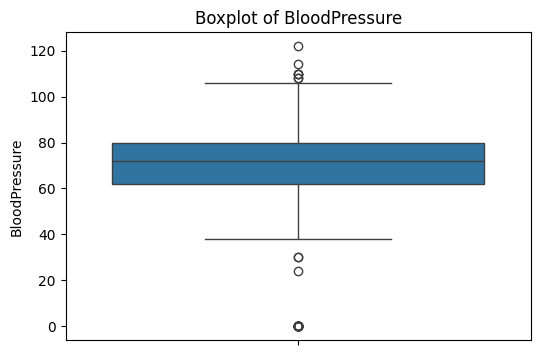

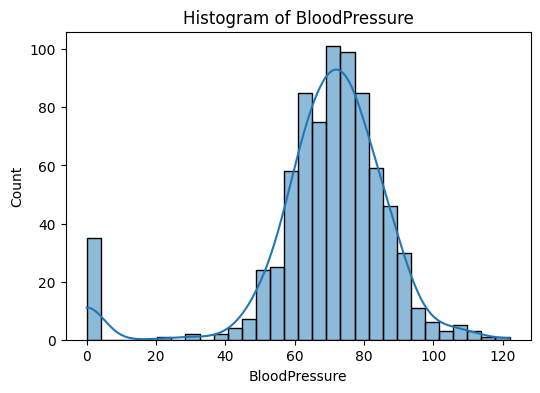

Skewness of BloodPressure: -1.8436079833551302


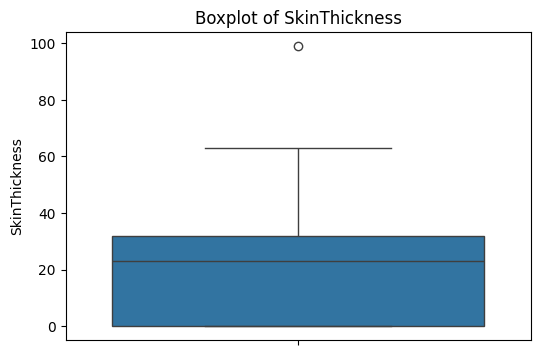

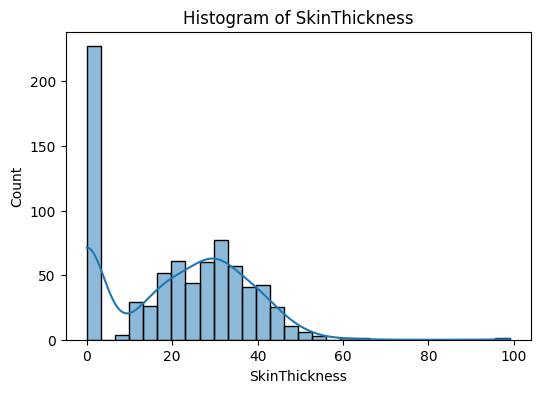

Skewness of SkinThickness: 0.10937249648187608


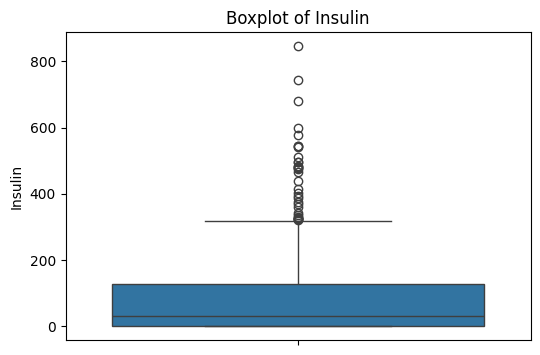

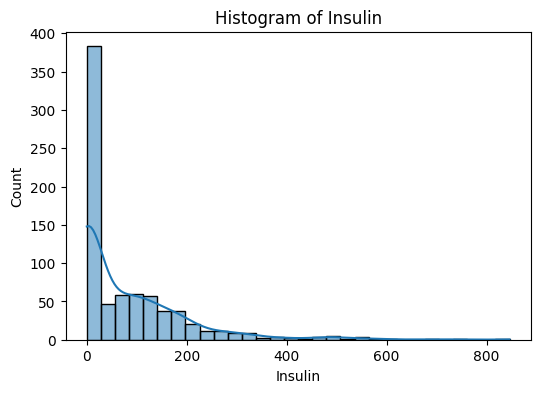

Skewness of Insulin: 2.272250858431574


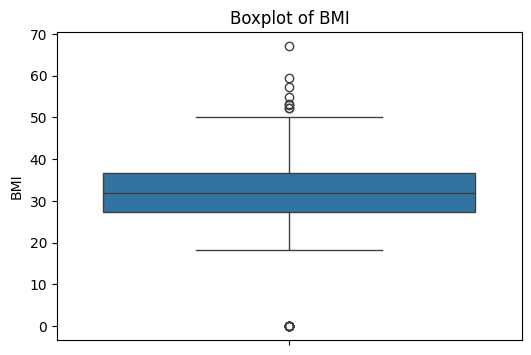

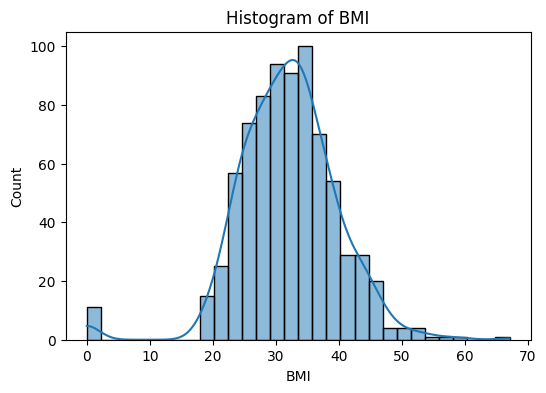

Skewness of BMI: -0.42898158845356543


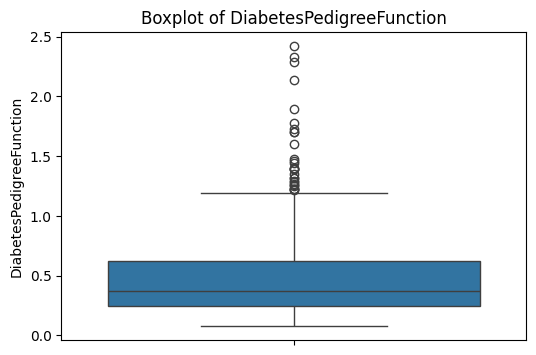

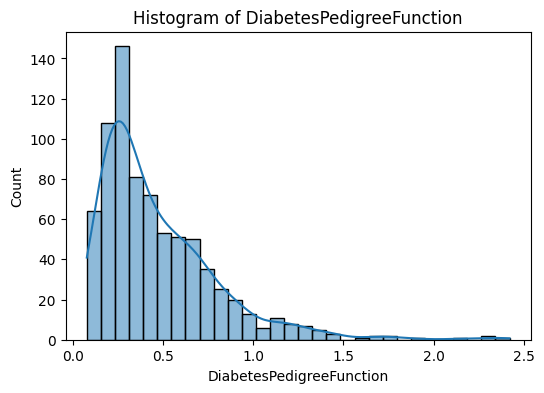

Skewness of DiabetesPedigreeFunction: 1.919911066307204


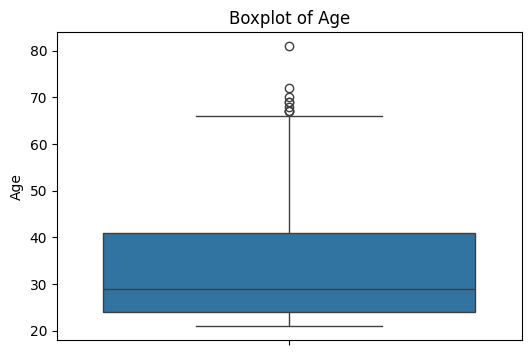

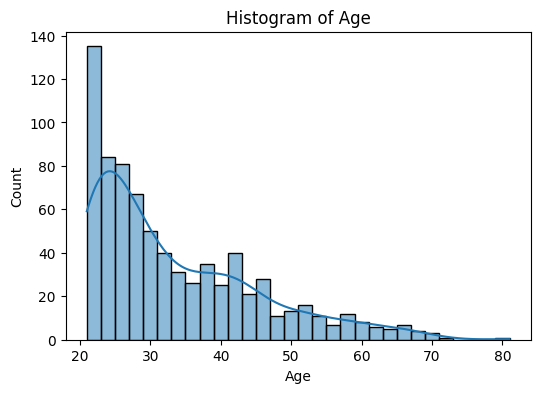

Skewness of Age: 1.1295967011444805


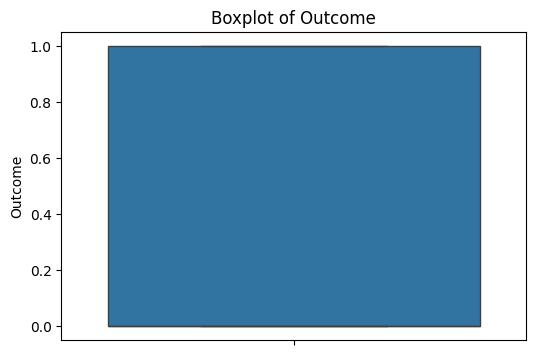

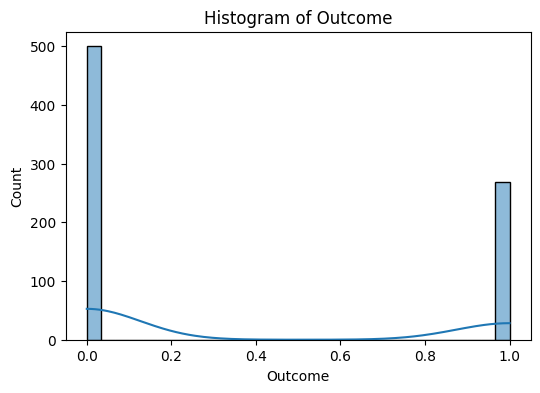

Skewness of Outcome: 0.635016643444986


In [8]:
continous_data=[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]
for i in continous_data[0]:
  plt.figure(figsize=(6,4))
  sns.boxplot(data=datset, y=i)
  plt.title(f'Boxplot of {i}')
  plt.show()
  plt.figure(figsize=(6,4))
  sns.histplot(datset[i], kde=True, bins=30)
  plt.title(f'Histogram of {i}')
  plt.show()
  print(f'Skewness of {i}: {datset[i].skew()}')

#  Analysis

In [9]:
summary = pd.DataFrame({
    "Mean": datset[continous_data[0]].mean(),
    "Median": datset[continous_data[0]].median(),
    "Std Dev": datset[continous_data[0]].std(),
    "Min": datset[continous_data[0]].min(),
    "Max": datset[continous_data[0]].max(),
    "Missing Values": datset[continous_data[0]].isnull().sum(),
    "Skewness": datset[continous_data[0]].skew(),
    "Kurtosis": datset[continous_data[0]].kurt()
})

print(summary)

                                Mean    Median     Std Dev     Min     Max  \
Glucose                   120.894531  117.0000   31.972618   0.000  199.00   
BloodPressure              69.105469   72.0000   19.355807   0.000  122.00   
SkinThickness              20.536458   23.0000   15.952218   0.000   99.00   
Insulin                    79.799479   30.5000  115.244002   0.000  846.00   
BMI                        31.992578   32.0000    7.884160   0.000   67.10   
DiabetesPedigreeFunction    0.471876    0.3725    0.331329   0.078    2.42   
Age                        33.240885   29.0000   11.760232  21.000   81.00   
Outcome                     0.348958    0.0000    0.476951   0.000    1.00   

                          Missing Values  Skewness  Kurtosis  
Glucose                                0  0.173754  0.640780  
BloodPressure                          0 -1.843608  5.180157  
SkinThickness                          0  0.109372 -0.520072  
Insulin                                0  2.2

# To Remove Outilier in BloodPressure, Insulin, BMI, DiabetesPedigreeFunction, Age

In [10]:
cols = ['BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for col in cols:
    Q1 = datset[col].quantile(0.25)
    Q3 = datset[col].quantile(0.75)

    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    datset = datset[(datset[col] >= lower) & (datset[col] <= upper)]

datset = datset.reset_index(drop=True)

print("Shape after removing outliers:", datset.shape)
display(datset)


Shape after removing outliers: (649, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
644,10,101,76,48,180,32.9,0.171,63,0
645,2,122,70,27,0,36.8,0.340,27,0
646,5,121,72,23,112,26.2,0.245,30,0
647,1,126,60,0,0,30.1,0.349,47,1


In [11]:
summary = pd.DataFrame({
    "Mean": datset[continous_data[0]].mean(),
    "Median": datset[continous_data[0]].median(),
    "Std Dev": datset[continous_data[0]].std(),
    "Min": datset[continous_data[0]].min(),
    "Max": datset[continous_data[0]].max(),
    "Missing Values": datset[continous_data[0]].isnull().sum(),
    "Skewness": datset[continous_data[0]].skew(),
    "Kurtosis": datset[continous_data[0]].kurt()
})

print(summary)

                                Mean   Median    Std Dev     Min      Max  \
Glucose                   118.403698  114.000  31.031750   0.000  198.000   
BloodPressure              72.053929   72.000  11.314603  38.000  106.000   
SkinThickness              20.950693   23.000  15.596099   0.000   99.000   
Insulin                    67.121726   37.000  81.733395   0.000  325.000   
BMI                        32.068567   32.000   6.424231  18.200   50.000   
DiabetesPedigreeFunction    0.424707    0.356   0.244117   0.078    1.162   
Age                        32.815100   29.000  11.152825  21.000   66.000   
Outcome                     0.318952    0.000   0.466430   0.000    1.000   

                          Missing Values  Skewness  Kurtosis  
Glucose                                0  0.156342  1.033520  
BloodPressure                          0  0.103715 -0.038772  
SkinThickness                          0  0.080549 -0.306398  
Insulin                                0  1.066004  0.

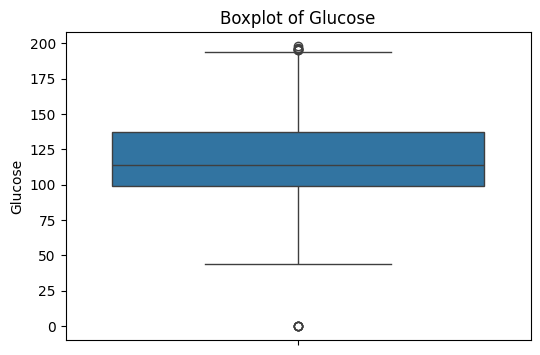

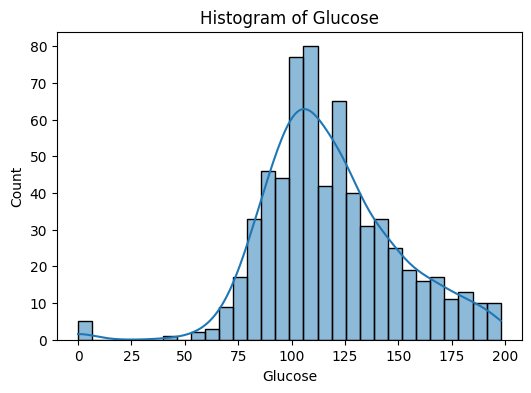

Skewness of Glucose: 0.15634217356281283


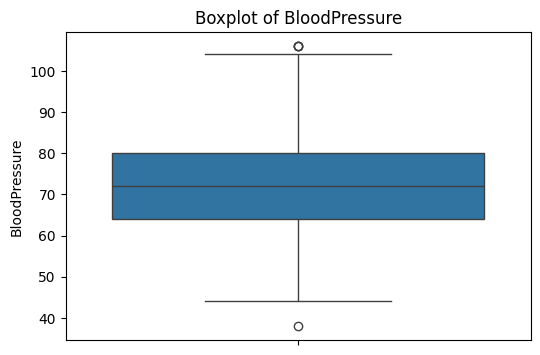

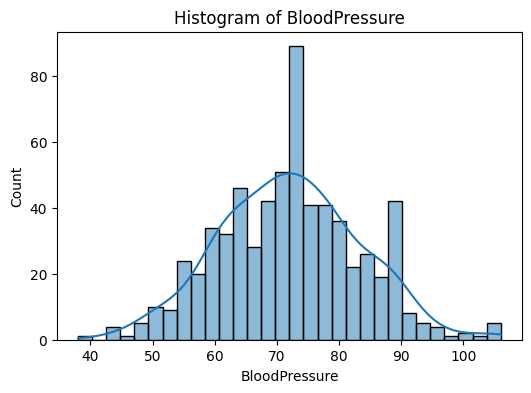

Skewness of BloodPressure: 0.10371479569597102


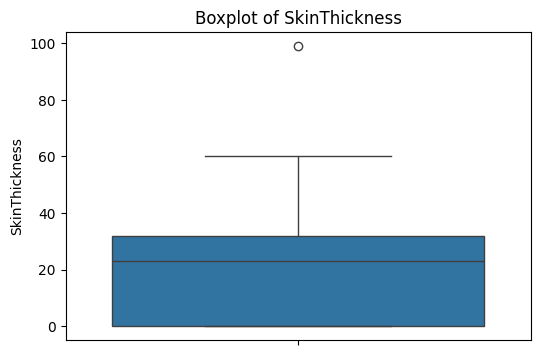

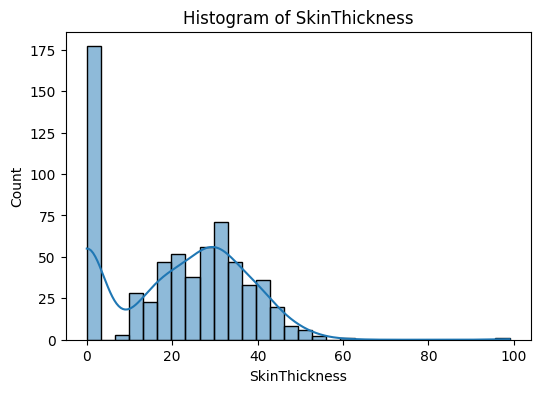

Skewness of SkinThickness: 0.0805485912616894


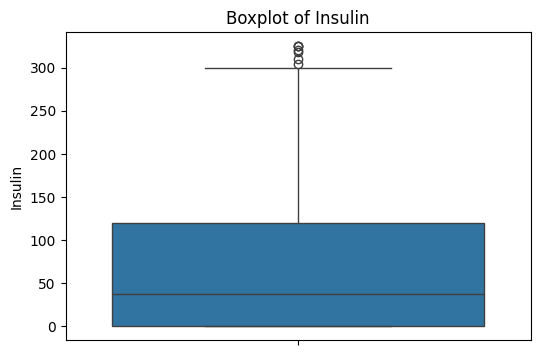

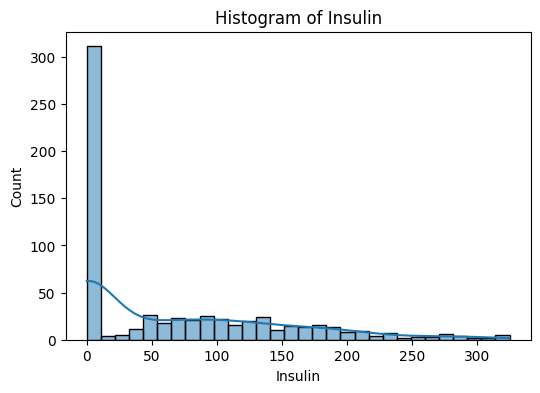

Skewness of Insulin: 1.0660041594595915


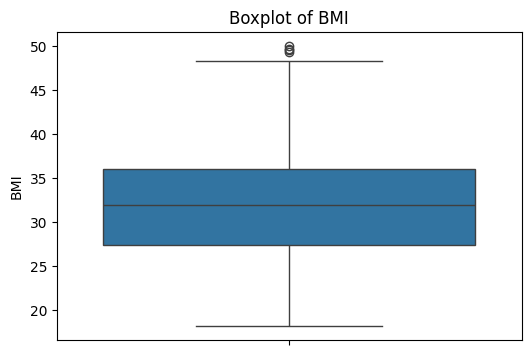

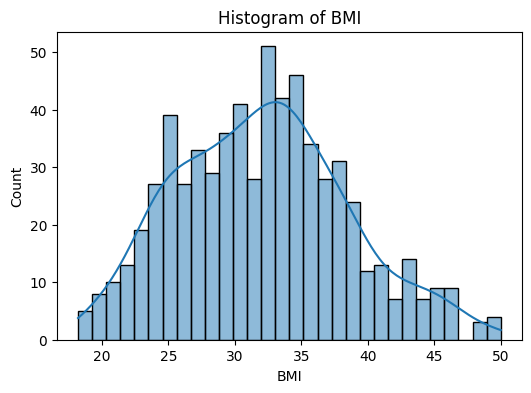

Skewness of BMI: 0.2687398852629266


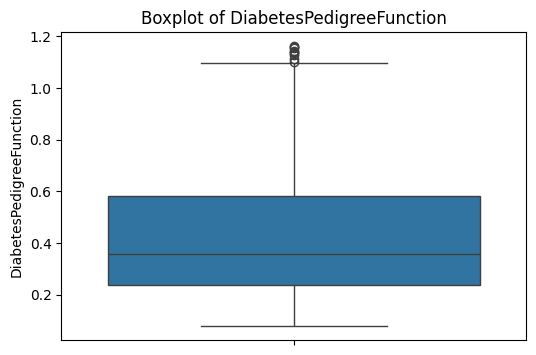

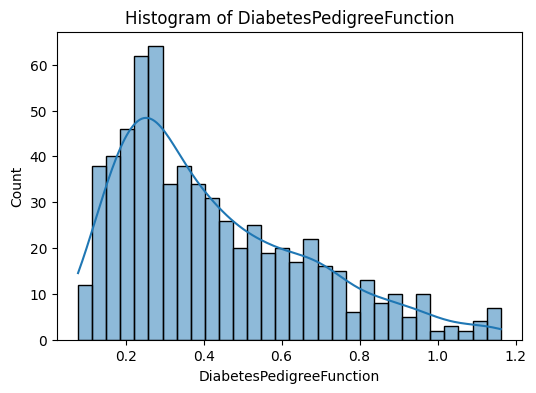

Skewness of DiabetesPedigreeFunction: 0.9149079346559787


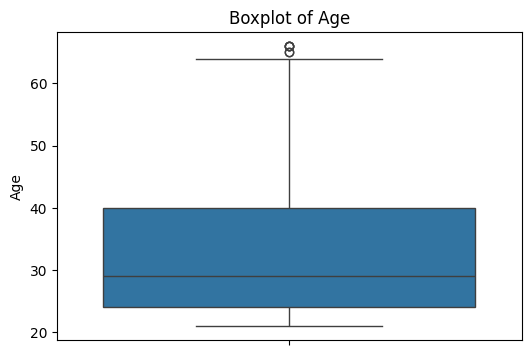

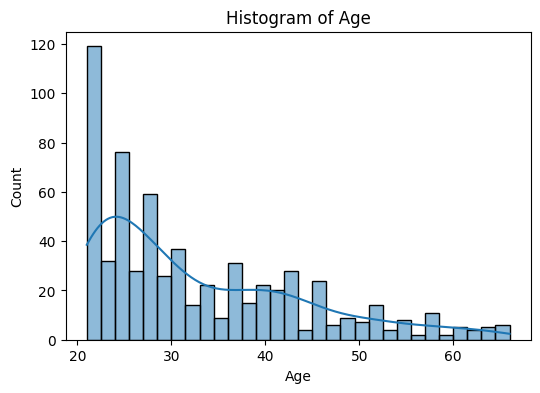

Skewness of Age: 1.0195969861961456


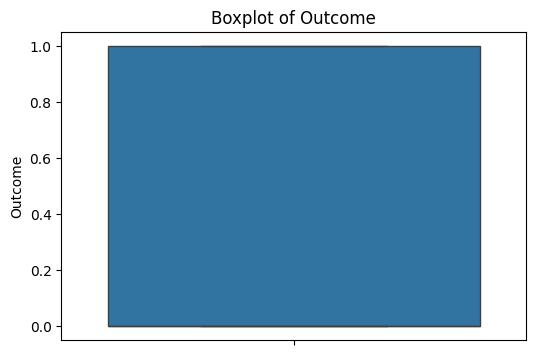

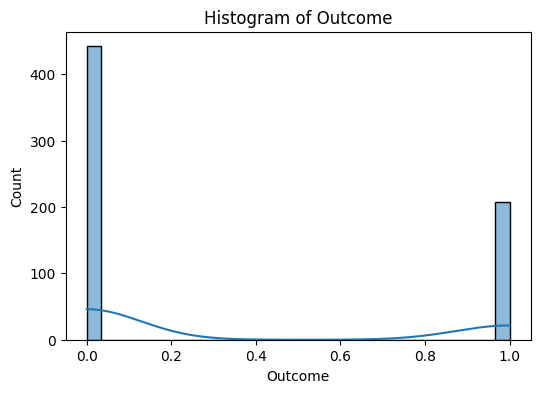

Skewness of Outcome: 0.7787124631146674


In [12]:
continous_data=[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]
for i in continous_data[0]:
  plt.figure(figsize=(6,4))
  sns.boxplot(data=datset, y=i)
  plt.title(f'Boxplot of {i}')
  plt.show()
  plt.figure(figsize=(6,4))
  sns.histplot(datset[i], kde=True, bins=30)
  plt.title(f'Histogram of {i}')
  plt.show()
  print(f'Skewness of {i}: {datset[i].skew()}')

# Train Split

In [13]:
X_Train,X_test,Y_Train,Y_test=train_test_split(datset.drop('Outcome',axis=1),datset['Outcome'],test_size=0.2,random_state=42)

# Data Standarization

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_Train=scaler.fit_transform(X_Train)
X_test=scaler.transform(X_test)

# Train

In [15]:
model=LogisticRegression()
model.fit(X_Train,Y_Train)

LogisticRegression()

# Test

In [16]:
predict_value=model.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, predict_value))

Accuracy: 0.8


# Visualization

In [17]:
2


2

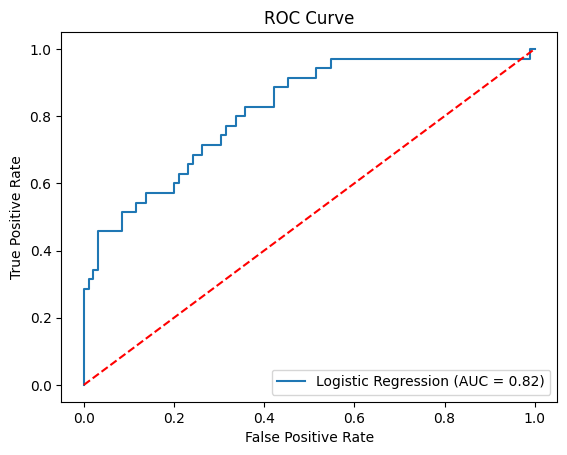

In [18]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label="Logistic Regression (AUC = %0.2f)" % roc_auc)
plt.plot([0,1], [0,1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [19]:
coefficients = pd.DataFrame({
    "Feature": datset.drop('Outcome', axis=1).columns,
    "Coefficient": model.coef_[0]
})
coefficients.sort_values(by="Coefficient", ascending=False)

,Feature,Coefficient
1,Glucose,1.208269
5,BMI,0.526090
6,DiabetesPedigreeFunction,0.384345
0,Pregnancies,0.371060
7,Age,0.210793
3,SkinThickness,0.014579
2,BloodPressure,-0.049185
4,Insulin,-0.089973


In [21]:
import gradio as gr
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


X = datset.drop('Outcome', axis=1)
y = datset['Outcome']



def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age):
    input_data = np.array([[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]])
    input_scaled = scaler.transform(input_data)
    pred_prob = model.predict_proba(input_scaled)[0][1]
    pred_class = model.predict(input_scaled)[0]
    result = "Diabetic" if pred_class == 1 else "Non-Diabetic"
    return f"Prediction: {result}", f"Probability of Diabetes: {pred_prob:.2f}"

interface = gr.Interface(
    fn=predict_diabetes,
    inputs=[
        gr.Number(value=1, label="Pregnancies"),
        gr.Number(value=120, label="Glucose"),
        gr.Number(value=70, label="Blood Pressure"),
        gr.Number(value=20, label="Skin Thickness"),
        gr.Number(value=79, label="Insulin"),
        gr.Number(value=32, label="BMI"),
        gr.Number(value=0.5, label="Diabetes Pedigree Function"),
        gr.Number(value=33, label="Age")
    ],
    outputs=[
        gr.Textbox(label="Prediction"),
        gr.Textbox(label="Probability")
    ],
    title="Diabetes Prediction App",
    description="Enter your health details to predict the probability of diabetes using Logistic Regression.",
    allow_flagging="never"
)

interface.launch()

/usr/local/lib/python3.12/dist-packages/gradio/interface.py:414: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated. Use `flagging_mode` instead.
  warnings.warn(


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f8bd450abc3e2b03c8.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
